In [165]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
pyber_combined= pd.merge(city_data, ride_data, how="left", on=["city", "city"])

master_df = pyber_combined
# Display the data table for preview
pyber_combined.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

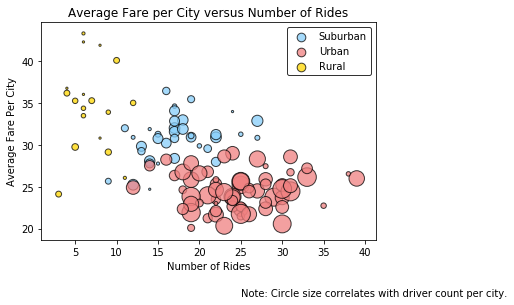

In [166]:
# Obtain the x and y coordinates for each of the three city types
city_group = master_df.groupby(["city","type"])

city_means = city_group.mean().reset_index()
del city_means["ride_id"]
rides_number = city_group.count().reset_index()
#merge
city_means["ride_count"]= rides_number["ride_id"]

#city_means

suburban_x = city_means.loc[city_means["type"]=="Suburban","ride_count"]
urban_x = city_means.loc[city_means["type"]=="Urban","ride_count"]
rural_x = city_means.loc[city_means["type"]=="Rural","ride_count"]

suburban_y = city_means.loc[city_means["type"]=="Suburban","fare"]
urban_y = city_means.loc[city_means["type"]=="Urban","fare"]
rural_y = city_means.loc[city_means["type"]=="Rural","fare"]

suburban_z = city_means.loc[city_means["type"]=="Suburban","driver_count"]
urban_z = city_means.loc[city_means["type"]=="Urban","driver_count"]
rural_z = city_means.loc[city_means["type"]=="Rural","driver_count"]

# Build the scatter plots for each city typesuse the scatter function
plt.scatter(suburban_x,suburban_y,suburban_z*5,c = ("LightSkyBlue"),alpha = .75, linewidth=1, edgecolor = "black",label = "Suburban")
plt.scatter(urban_x,urban_y,urban_z*5,c = ("LightCoral"),alpha = .75, linewidth=1, edgecolor = "black",label = "Urban")
plt.scatter(rural_x,rural_y,rural_z*5,c = ("Gold"),alpha = .75, linewidth=1, edgecolor = "black",label = "Rural")


 
# Incorporate the other graph properties
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# Create a legend
plt.legend()
legend = plt.legend(frameon = True , edgecolor = 'black')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
# Incorporate a text label regarding circle size
plt.text(25,12,"Note: Circle size correlates with driver count per city.")
# Save Figure
plt.show()

## Total Fares by City Type

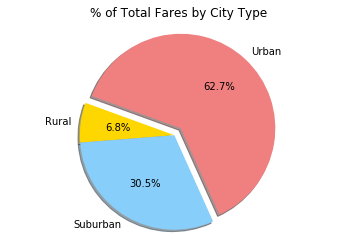

In [214]:
#type group by used for all the pie chart calculations
type_group = master_df.groupby(["type"])
#total fare by city type
fare_sum = type_group.sum()['fare']
#user labels from fare sum index
labels = fare_sum.index

#trying a differnet metho of importing colors and labels and adding some EXPLODE
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = [0, 0, .1]
#plot the graph using references
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#pie chart title
plt.title('% of Total Fares by City Type')
#show figure
plt.show()

## Total Rides by City Type

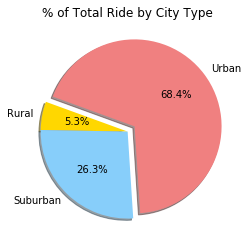

In [226]:
#total fare by city
ride_sum = type_group.count()['ride_id']
#user labels from fare sum index
labels = ride_sum.index

#trying a differnet metho of importing colors and labels and adding some EXPLODE
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = [0, 0, .1]
#plot the graph using references
plt.pie(ride_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#pie chart title
plt.title('% of Total Ride by City Type')
#show figure
plt.show()

## Total Drivers by City Type

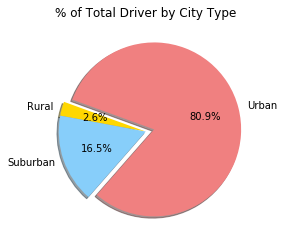

In [229]:
#total fare by city
driver_sum = city_data.groupby('type').sum()['driver_count']
#user labels from driver sum index
labels = driver_sum.index

#trying a differnet metho of importing colors and labels and adding some EXPLODE
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = [0, 0, .1]
#plot the graph using references
plt.pie(driver_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#pie chart title
plt.title('% of Total Driver by City Type')
#show figure
plt.show()

## Three Observable Trends
1. Urban City Types are the largest in terms of % of total fare, drivers, and rides. Followed by suburban, then rural.
2. The more drivers there are in a given locations, the more rides that are given, but lower the averge fare tends to be per city. So although the urban type takes the cake for largest overall contribution to the company in fare, the average ride fare in suburban and rural tends to be higher. 
3. Generally, the average fare per city and number of rides per city are negatively coorelated. Meaning the more rides per city, the less revenue each ride brings in, on average.